In [1]:
import project59970 as proj
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ghg_df = proj.create_dataframe()    # CapeGrim dataset
ghg_df.head()

,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S),"Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?",Does the facility employ continuous emissions monitoring?
0,1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298140,-96.531430,...,NaN,NaN,NaN,199011.75,NaN,NaN,NaN,N,N,N
1,1010040,1.100555e+11,15-18565/15-18662,Hazard,KY,40701,4200 S. Hwy 15,PERRY COUNTY,37.219099,-83.156046,...,NaN,118204.5,NaN,NaN,NaN,NaN,NaN,N,N,N
2,1010085,1.100555e+11,15-19015,Hazard,KY,41701,1845 S. KY HWY 15,PERRY,37.236617,-83.181260,...,NaN,55872.5,NaN,NaN,NaN,NaN,NaN,N,N,N
3,1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
4,1006394,NaN,29-6 #2 Central Delivery Point,Blanco,NM,87412,NaN,Rio Arriba,36.745200,-107.445500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


In [3]:
ghg_df = ghg_df.fillna(0)
ghg_df.head()

,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S),"Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?",Does the facility employ continuous emissions monitoring?
0,1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298140,-96.531430,...,0.0,0.0,0.0,199011.75,0.0,0.0,0.0,N,N,N
1,1010040,1.100555e+11,15-18565/15-18662,Hazard,KY,40701,4200 S. Hwy 15,PERRY COUNTY,37.219099,-83.156046,...,0.0,118204.5,0.0,0.00,0.0,0.0,0.0,N,N,N
2,1010085,1.100555e+11,15-19015,Hazard,KY,41701,1845 S. KY HWY 15,PERRY,37.236617,-83.181260,...,0.0,55872.5,0.0,0.00,0.0,0.0,0.0,N,N,N
3,1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,N,N,N
4,1006394,0.000000e+00,29-6 #2 Central Delivery Point,Blanco,NM,87412,0,Rio Arriba,36.745200,-107.445500,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,N,N,N


In [4]:
def total_emissions(header):
    chem = 0.0
    for i in range(len(ghg_df)):
        try:
            chem += float(ghg_df[header].values[i])
        except:
            pass
    return chem

In [5]:
co2 = total_emissions('CO2 emissions (non-biogenic) ')
co2 += total_emissions('Other GHGs (metric tons CO2e)')
co2 += total_emissions('Biogenic CO2 emissions (metric tons)')

ch4 = total_emissions('Methane (CH4) emissions ')

n2o = total_emissions('Nitrous Oxide (N2O) emissions ')

hfc = total_emissions('HFC emissions')

pfc = total_emissions('PFC emissions')

sf6 = total_emissions('SF6 emissions ')

nf3 = total_emissions('NF3 emissions')

other = total_emissions('Other Fully Fluorinated GHG emissions')

hfe = total_emissions('HFE emissions')

vslc = total_emissions('Very Short-lived Compounds emissions')

In [41]:
data = [co2, ch4, n2o, hfc, pfc, sf6, nf3, other, hfe, vslc]
total = sum(data)

co2_per = (data[2] / total) * 100
co2_per

0.8292367102662044

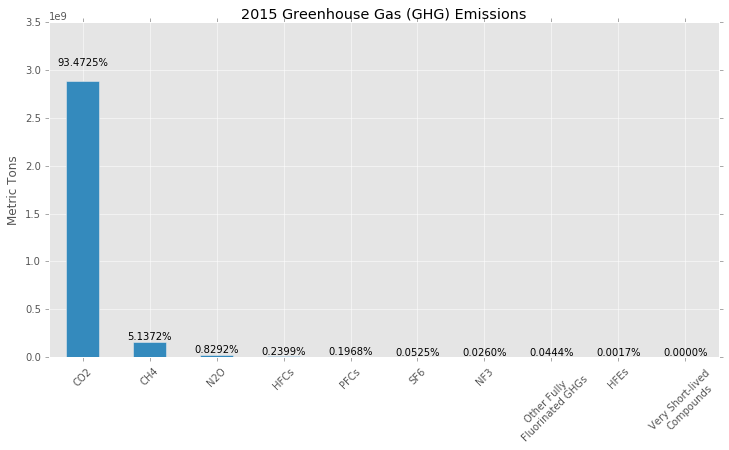

In [50]:
data = [co2, ch4, n2o, hfc, pfc, sf6, nf3, other, hfe, vslc]
total = sum(data)
ind = np.arange(len(data))
width = 0.5

fig, ax = plt.subplots(figsize=(12, 6))
chart = ax.bar(ind + 0.25, data, width)

ax.set_title('2015 Greenhouse Gas (GHG) Emissions')
ax.set_xticks(ind + width)
ax.set_xticklabels(['CO2', 'CH4', 'N2O', 'HFCs', 'PFCs', 'SF6', 'NF3', 'Other Fully \nFluorinated GHGs', 'HFEs', 'Very Short-lived \nCompounds'], rotation=45)
ax.set_ylabel('Metric Tons')
ax.set_ylim([0, 3.5e9])

for bar in chart:
    percent = (bar.get_height() / total) * 100.0
    ax.text(bar.get_x() + bar.get_width() / 2., 1.05*bar.get_height(), '%0.4f' % percent + '%', ha='center', va='bottom')

plt.show()

### Greenhouse gas emissions are almost entirely carbon dioxide (CO2) at about 93%. Second is methane (CH4) at about 5%, and is not even relatively close to the amount of CO2 emissions.